In [80]:
!pip install geopandas

In [81]:
import pandas as pd
import geopandas as gpd
from branca.element import Figure

In [82]:
# from google.colab import files 

# uploaded = files.upload()

In [83]:
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster


In [84]:
df=pd.read_csv('Medical_final.csv')
df.head()

,Neighbourhood,Latitude,Longitude,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating
0,Agol,23.02776,72.60027,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000
1,Ahmedabad Cantonment,23.02776,72.60027,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000
2,Alam Roza,23.00212,72.54979,60,4.489189,60,4.169444,32,4.942857,60,4.351613,10,4.760000
3,Ambawadi,23.01885,72.55441,60,4.578571,60,4.369767,56,4.493548,60,4.405714,10,4.542857
4,Amraiwadi,23.00735,72.62268,47,4.144444,27,4.607692,16,4.655556,40,3.968182,3,4.950000


In [85]:
out=pd.read_csv('out.csv')
out.head()


,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,labels
0,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,2
1,33,4.475000,45,4.712500,12,4.812500,39,4.420833,0,0.000000,2
2,60,4.489189,60,4.169444,32,4.942857,60,4.351613,10,4.760000,0
3,60,4.578571,60,4.369767,56,4.493548,60,4.405714,10,4.542857,0
4,47,4.144444,27,4.607692,16,4.655556,40,3.968182,3,4.950000,3


In [86]:
df['labels']=out['labels']

In [87]:
df1 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude,df.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
df1.crs = {'init': 'epsg:4326'}

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [88]:
regions = gpd.read_file("Wards.geojson")
print(regions.crs)

epsg:4326


In [89]:
regions.head()

,Name,geometry
0,48 RAMOL HATHIJAN,"POLYGON Z ((72.64795 22.99784 0.00000, 72.6474..."
1,47 VATVA,"POLYGON Z ((72.61962 22.98128 0.00000, 72.6194..."
2,46 LAMBHA,"POLYGON Z ((72.58829 22.97285 0.00000, 72.5881..."
3,45 ISANPUR,"POLYGON Z ((72.60390 22.98860 0.00000, 72.6037..."
4,44 KHOKHRA,"POLYGON Z ((72.60813 23.01394 0.00000, 72.6070..."


# Graph showing all the wards of ahmedabad.



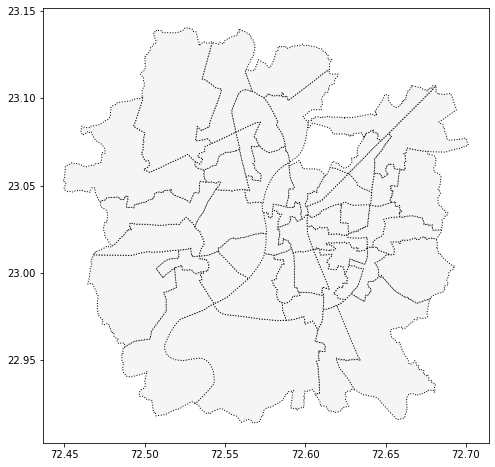

In [90]:
ax = regions.plot(figsize=(8,8),color='whitesmoke', linestyle=':', edgecolor='black')


# Plot to see outlier regions in our dataset.

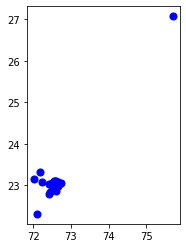

In [91]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
ax.set_aspect('equal')
df1.plot(ax=ax,markersize=50,marker='o', color='blue')
# df1=df1.drop(72)




In [92]:
df1=df1.drop(13)
df1=df1.drop(15)
df1=df1.drop(23)
df1=df1.drop(80)
df1=df1.drop(55)
df1=df1.drop(29)
df1=df1.drop(8)
df1=df1.drop(11)
df1=df1.drop(18)

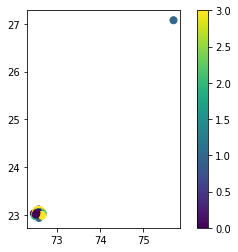

In [93]:
df1.plot(markersize=50,column='labels',legend=True)
# Label
# 0-purple
# 1-blue
# 2-green
# 3-yellow


In [ ]:
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
color_mapping = {0: "green",1: "red",2: "orange",3: "purple"}
df1.plot(ax=ax,markersize=50,color=df1["labels"].map(color_mapping))
ax.set()

In [94]:
df1['Mean_hospital_rating']=df1['Mean_hospital_rating'].round(decimals=2)
df1['Mean_doctor_rating']=df1['Mean_doctor_rating'].round(decimals=2)
df1['Mean_dentist_rating']=df1['Mean_dentist_rating'].round(decimals=2)
df1['Mean_pharmacy_rating']=df1['Mean_pharmacy_rating'].round(decimals=2)

In [95]:
df1.head()

,Neighbourhood,Latitude,Longitude,Hospital_Count,Mean_hospital_rating,Doctor_Count,Mean_doctor_rating,Dentist_Count,Mean_dentist_rating,Pharmacy_Count,Mean_pharmacy_rating,Physiotherapist_Count,Mean_physiotherapist_rating,labels,geometry
0,Agol,23.02776,72.60027,33,4.48,45,4.71,12,4.81,39,4.42,0,0.000000,2,POINT (72.60027 23.02776)
1,Ahmedabad Cantonment,23.02776,72.60027,33,4.48,45,4.71,12,4.81,39,4.42,0,0.000000,2,POINT (72.60027 23.02776)
2,Alam Roza,23.00212,72.54979,60,4.49,60,4.17,32,4.94,60,4.35,10,4.760000,0,POINT (72.54979 23.00212)
3,Ambawadi,23.01885,72.55441,60,4.58,60,4.37,56,4.49,60,4.41,10,4.542857,0,POINT (72.55441 23.01885)
4,Amraiwadi,23.00735,72.62268,47,4.14,27,4.61,16,4.66,40,3.97,3,4.950000,3,POINT (72.62268 23.00735)


In [96]:
df1.to_csv('medical_drop_label.csv')

A basic graph to show regions in the medical_data dataset with icons coloured with labels.

In [97]:
fig0=Figure(width=800,height=450)
def color(elev): 
    if elev==0: 
        col = 'green'
    elif elev ==1: 
        col = 'red'
    elif elev ==2: 
        col = 'orange'
    else: 
        col='blue'
    return col 

m_2 = folium.Map(location=[23,72.55], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
for lat, lon ,name in zip(df1['Latitude'],df1['Longitude'],df1['labels']):
    Marker([lat,lon],popup=str(name),
           icon= folium.Icon(color=color(name),prefix='fa',icon='h-square')).add_to(m_2)
fig0.add_child(m_2)

# Display the map
m_2  

# Clustered Graph of regions.
## Clustering is done on the basis of distance by MarkerCluster package of Folium.

In [98]:
map_cluster = folium.Map(location=[23,72.55], tiles='cartodbpositron', zoom_start=13)

# Add points to the map
mc = MarkerCluster()
for idx, row in df1.iterrows():
          mc.add_child(Marker([row['Latitude'], row['Longitude']]))
map_cluster.add_child(mc)

# Display the map
map_cluster

# Graph with location of Hospital count greater than 50 in a neighbourhood is shown with red colour and less than 50 with green

In [99]:
map_hosp_count = folium.Map(location=[23,72.55], zoom_start=13)
def color_producer(val):
    if val <= 50:
        return 'green'
    else:
        return 'red'

# Add a bubble map to the base map
for i in range(0,len(df1)):
    Circle(
        location=[df1.iloc[i]['Latitude'], df1.iloc[i]['Longitude']],
        radius=50,
        color=color_producer(df1.iloc[i]['Hospital_Count'])).add_to(map_hosp_count)

# Display the map
map_hosp_count

# Graph with location of Doctor count greater than 30 in a neighbourhood is shown with red colour and less than 30 with green

In [100]:
map_doc_count = folium.Map(location=[23,72.55], zoom_start=13)
def color_producer(val):
    if val <= 30:
        return 'green'
    else:
        return 'red'

# Add a bubble map to the base map
for i in range(0,len(df1)):
    Circle(
        location=[df1.iloc[i]['Latitude'], df1.iloc[i]['Longitude']],
        radius=50,
        color=color_producer(df1.iloc[i]['Doctor_Count'])).add_to(map_doc_count)

# Display the map
map_doc_count

# Graph with location of Pharmacy count greater than 40 in a neighbourhood is shown with red colour and less than 40 with green

In [101]:
map_pharm_count = folium.Map(location=[23,72.55], zoom_start=13)
def color_producer(val):
    if val <= 40:
        return 'green'
    else:
        return 'red'

# Add a bubble map to the base map
for i in range(0,len(df1)):
    Circle(
        location=[df1.iloc[i]['Latitude'], df1.iloc[i]['Longitude']],
        radius=50,
        color=color_producer(df1.iloc[i]['Pharmacy_Count'])).add_to(map_pharm_count)

# Display the map
map_pharm_count

## An all-in-one map showing details of hospitals,doctors,pharmacy,dentists with icons coloured according to labels aassigned in dataset.

## One can also toggle between different themes in the map.

In [102]:
# Hover over the upper right icon to change different themes or to view details of different services offered in the region.

fig2=Figure(width=800,height=450)
def color(elev): 
    if elev==0: 
        col = 'green'
    elif elev ==1: 
        col = 'red'
    elif elev ==2: 
        col = 'orange'
    else: 
        col='blue'
    return col 

hosp = folium.FeatureGroup(name="Hospitals")
doc = folium.FeatureGroup(name="Doctors")
dent = folium.FeatureGroup(name="Dentists")
pharm = folium.FeatureGroup(name="Pharmacy")

m_3 = folium.Map(location=[23,72.55], zoom_start=13)

folium.TileLayer('cartodbpositron').add_to(m_3)
folium.TileLayer('cartodbdark_matter').add_to(m_3)


# Add points to the map
for lat, lon ,label,numhosp,ratinghosp in zip(df1['Latitude'],df1['Longitude'],df1['labels'],df1['Hospital_Count'],df1['Mean_hospital_rating']):
    Marker([lat,lon],popup="Number of hospitals="+str(numhosp)+"\nMean Rating:"+ str(ratinghosp)+"\nLabel:"+str(label),
           icon= folium.Icon(color=color(label),prefix='fa',icon='h-square')).add_to(hosp)

for lat, lon ,label,numdoc,ratingdoc in zip(df1['Latitude'],df1['Longitude'],df1['labels'],df1['Doctor_Count'],df1['Mean_doctor_rating']):
    Marker([lat,lon],popup="Number of doctors="+str(numdoc)+"\nMean Rating:"+ str(ratingdoc)+"\nLabel:"+str(label),
           icon= folium.Icon(color=color(label),prefix='fa',icon='user-md')).add_to(doc)

for lat, lon ,label,numdent,ratingdent in zip(df1['Latitude'],df1['Longitude'],df1['labels'],df1['Dentist_Count'],df1['Mean_dentist_rating']):
    Marker([lat,lon],popup="Number of dentists="+str(numdent)+"\nMean Rating:"+ str(ratingdent)+"\nLabel:"+str(label),
           icon= folium.Icon(color=color(label),prefix='fa',icon='user-md')).add_to(dent)

for lat, lon ,label,numpharm,ratingpharm in zip(df1['Latitude'],df1['Longitude'],df1['labels'],df1['Pharmacy_Count'],df1['Mean_pharmacy_rating']):
    Marker([lat,lon],popup="Number of pharmacy="+str(numpharm)+"\nMean Rating:"+ str(ratingpharm)+"\nLabel:"+str(label),
           icon= folium.Icon(color=color(label),prefix='fa',icon='medkit')).add_to(pharm)
fig2.add_child(m_3)

m_3.add_child(hosp)

m_3.add_child(doc)

m_3.add_child(dent)
m_3.add_child(pharm)
m_3.add_child(folium.LayerControl())

# Display the map
m_3  

In [103]:
df2=pd.read_csv('School_final.csv')
print(df2.info())
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighbourhood           73 non-null     object 
 1   Latitude                73 non-null     float64
 2   Longitude               73 non-null     float64
 3   School_Count            73 non-null     int64  
 4   Mean_school_rating      73 non-null     float64
 5   University_Count        73 non-null     int64  
 6   Mean_university_rating  72 non-null     float64
 7   Bookstore_Count         73 non-null     int64  
 8   Mean_bookstore_rating   71 non-null     float64
 9   Museum_Count            73 non-null     int64  
 10  Mean_museum_rating      65 non-null     float64
 11  Library_Count           73 non-null     int64  
 12  Mean_library_rating     70 non-null     float64
dtypes: float64(7), int64(5), object(1)
memory usage: 7.5+ KB
None


,Neighbourhood,Latitude,Longitude,School_Count,Mean_school_rating,University_Count,Mean_university_rating,Bookstore_Count,Mean_bookstore_rating,Museum_Count,Mean_museum_rating,Library_Count,Mean_library_rating
0,Agol,23.02776,72.60027,58,4.262857,12,3.888889,49,4.290476,11,4.433333,3,4.766667
1,Ahmedabad Cantonment,23.02776,72.60027,58,4.262857,12,3.888889,49,4.290476,11,4.433333,3,4.766667
2,Alam Roza,23.00212,72.54979,60,4.428571,21,4.473333,7,3.433333,3,NaN,7,4.366667
3,Ambawadi,23.01885,72.55441,58,4.440541,57,4.294737,9,3.550000,8,4.850000,4,3.866667
4,Amraiwadi,23.00735,72.62268,60,3.837143,11,4.250000,10,4.450000,3,3.900000,4,3.975000


In [104]:
# df2[df2['Museum_Count']==11]
df2=df2.drop([1,8,17,30,38,53,68]).reset_index()
# df2=df2.drop([68]).reset_index()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   66 non-null     int64  
 1   Neighbourhood           66 non-null     object 
 2   Latitude                66 non-null     float64
 3   Longitude               66 non-null     float64
 4   School_Count            66 non-null     int64  
 5   Mean_school_rating      66 non-null     float64
 6   University_Count        66 non-null     int64  
 7   Mean_university_rating  65 non-null     float64
 8   Bookstore_Count         66 non-null     int64  
 9   Mean_bookstore_rating   64 non-null     float64
 10  Museum_Count            66 non-null     int64  
 11  Mean_museum_rating      58 non-null     float64
 12  Library_Count           66 non-null     int64  
 13  Mean_library_rating     63 non-null     float64
dtypes: float64(7), int64(6), object(1)
memory us

In [105]:
list=['Mean_school_rating','Mean_university_rating','Mean_bookstore_rating','Mean_museum_rating','Mean_library_rating']
for i in list:
  df2[i]=df2[i].round(decimals=2)

## An all-in-one map showing details of schools,universities,museums,bookstores and libraries.

## One can also toggle between different themes in the map.

In [106]:
fig3=Figure(width=700,height=450)

def color(elev): 
    if elev==0: 
        col = 'blue'
    elif elev ==1: 
        col = 'red'
    elif elev ==2: 
        col = 'orange'
    elif elev ==3: 
        col = 'purple'
    else: 
        col='green'
    return col 
schl = folium.FeatureGroup(name="Schools")
univ = folium.FeatureGroup(name="Universities")
bookst = folium.FeatureGroup(name="Bookstores")
museum = folium.FeatureGroup(name="Museums")
libr = folium.FeatureGroup(name="Libraries")

m_4 = folium.Map(location=[23,72.55], zoom_start=13)

folium.TileLayer('cartodbpositron').add_to(m_4)
folium.TileLayer('cartodbdark_matter').add_to(m_4)

# Add points to the map
for lat, lon ,numschl,ratingschl in zip(df2['Latitude'],df2['Longitude'],df2['School_Count'],df2['Mean_school_rating']):
    Marker([lat,lon],popup="Number of Schools ="+str(numschl)+"\nMean Rating:"+ str(ratingschl),
           icon= folium.Icon(color=color(0),prefix='fa',icon='child')).add_to(schl)

for lat, lon ,numuniv,ratinguniv in zip(df2['Latitude'],df2['Longitude'],df2['University_Count'],df2['Mean_university_rating']):
    Marker([lat,lon],popup="Number of Universities ="+str(numuniv)+"\nMean Rating:"+ str(ratinguniv),
           icon= folium.Icon(color=color(1),prefix='fa',icon='graduation-cap')).add_to(univ)

for lat, lon ,numbookst,ratingbookst in zip(df2['Latitude'],df2['Longitude'],df2['Bookstore_Count'],df2['Mean_bookstore_rating']):
    Marker([lat,lon],popup="Number of Bookstores="+str(numbookst)+"\nMean Rating:"+ str(ratingbookst),
           icon= folium.Icon(color=color(2),prefix='fa',icon='book')).add_to(bookst)

for lat, lon ,nummuseum,ratingmuseum in zip(df2['Latitude'],df2['Longitude'],df2['Museum_Count'],df2['Mean_museum_rating']):
    Marker([lat,lon],popup="Number of Museums="+str(nummuseum)+"\nMean Rating:"+ str(ratingmuseum),
           icon= folium.Icon(color=color(3),prefix='fa',icon='building')).add_to(museum)

for lat, lon ,numlibr,ratinglibr in zip(df2['Latitude'],df2['Longitude'],df2['Library_Count'],df2['Mean_library_rating']):
    Marker([lat,lon],popup="Number of Library="+str(numlibr)+"\nMean Rating:"+ str(ratinglibr),
           icon= folium.Icon(color=color(4),prefix='fa',icon='book')).add_to(libr)

fig3.add_child(m_4)

m_4.add_child(schl)
m_4.add_child(univ)
m_4.add_child(bookst)
m_4.add_child(museum)
m_4.add_child(libr)



m_4.add_child(folium.LayerControl())
# Display the map
m_4  


In [107]:
df3=pd.read_csv('Food_final.csv')
print(df3.info())
df3.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neighbourhood                 73 non-null     object 
 1   Latitude                      73 non-null     float64
 2   Longitude                     73 non-null     float64
 3   Bakery_Count                  73 non-null     int64  
 4   Mean_bakery_rating            72 non-null     float64
 5   Cafe_Count                    73 non-null     int64  
 6   Mean_cafe_rating              73 non-null     float64
 7   ConvenienceStore_Count        73 non-null     int64  
 8   Mean_conveniencestore_rating  55 non-null     float64
 9   Food_Count                    73 non-null     int64  
 10  Mean_Food_rating              73 non-null     float64
 11  Supermarket_Count             73 non-null     int64  
 12  Mean_supermarket_rating       72 non-null     float64
 13  MealDel

,Neighbourhood,Latitude,Longitude,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating
0,Agol,23.02776,72.60027,31,4.025000,43,4.100000,1,NaN,60,3.986364,38,4.380952,1,5.0,58,3.973469
1,Ahmedabad Cantonment,23.02776,72.60027,31,4.025000,43,4.100000,1,NaN,60,3.986364,38,4.380952,1,5.0,58,3.973469
2,Alam Roza,23.00212,72.54979,24,4.250000,15,4.333333,0,0.0,60,3.942222,5,4.033333,2,4.1,60,4.275000
3,Ambawadi,23.01885,72.55441,21,4.375000,53,4.230952,1,NaN,60,3.909434,6,4.525000,5,3.5,60,4.091837
4,Amraiwadi,23.00735,72.62268,14,4.344444,25,4.150000,1,NaN,60,4.008333,15,4.370000,0,0.0,60,4.027083


In [108]:
list=['Mean_bakery_rating','Mean_cafe_rating','Mean_conveniencestore_rating','Mean_supermarket_rating','Mean_restaurant_rating']
for i in list:
  df3[i]=df3[i].round(decimals=2)

In [109]:
df3=df3.drop([1,8,17,30,38,53,68]).reset_index()
# df3[df3['Bakery_Count']==6]

In [110]:
df3.describe()

,index,Latitude,Longitude,Bakery_Count,Mean_bakery_rating,Cafe_Count,Mean_cafe_rating,ConvenienceStore_Count,Mean_conveniencestore_rating,Food_Count,Mean_Food_rating,Supermarket_Count,Mean_supermarket_rating,MealDelivery_Count,Mean_mealdelivery_rating,Restaurant_Count,Mean_restaurant_rating
count,66.000000,66.000000,66.000000,66.000000,65.000000,66.000000,66.000000,66.000000,55.000000,66.000000,66.000000,66.000000,65.000000,66.000000,63.000000,66.000000,66.000000
mean,36.560606,23.029386,72.578781,17.424242,3.828615,27.772727,3.997273,0.636364,1.280000,58.272727,4.052391,10.636364,3.919692,1.863636,2.626512,56.606061,4.110606
std,21.001193,0.040731,0.047314,11.697548,1.258063,17.490917,0.943311,0.888150,1.963005,8.068067,0.535049,10.271149,1.198684,2.523041,2.042972,10.331250,0.142374
min,0.000000,22.855700,72.407760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.610000
25%,19.250000,23.006413,72.554620,10.250000,4.020000,16.250000,4.040000,0.000000,0.000000,60.000000,3.983750,5.250000,3.990000,0.000000,0.000000,60.000000,4.032500
50%,36.500000,23.028370,72.585510,16.000000,4.230000,25.000000,4.230000,0.000000,0.000000,60.000000,4.110969,8.000000,4.280000,1.000000,3.800000,60.000000,4.115000
75%,54.750000,23.050100,72.605050,24.750000,4.340000,38.500000,4.347500,1.000000,3.750000,60.000000,4.227000,12.750000,4.500000,2.000000,4.200000,60.000000,4.190000
max,72.000000,23.112140,72.676110,41.000000,5.000000,60.000000,4.810000,3.000000,5.000000,60.000000,4.530435,52.000000,5.000000,13.000000,5.000000,60.000000,4.600000


## An all-in-one map showing details of Bakery,Cafes,Convenience Stores,Supermarkets and Restaurents in regions of Ahmedabad.

## One can also toggle between different themes in the map.

In [111]:
fig4=Figure(width=700,height=450)
def color(elev): 
    if elev==0: 
        col = 'blue'
    elif elev ==1: 
        col = 'red'
    elif elev ==2: 
        col = 'orange'
    elif elev ==3: 
        col = 'purple'
    else: 
        col='green'
    return col 
bak= folium.FeatureGroup(name="Bakery")
cafe= folium.FeatureGroup(name="Cafe")
conv= folium.FeatureGroup(name="Convenience_Stores")
superm= folium.FeatureGroup(name="Supermarkets")
resto= folium.FeatureGroup(name="Restaurants")

m_5 = folium.Map(location=[23,72.55], zoom_start=13)

folium.TileLayer('cartodbpositron').add_to(m_5)
folium.TileLayer('cartodbdark_matter').add_to(m_5)

# Add points to the map
for lat, lon ,numbak,ratingbak in zip(df3['Latitude'],df3['Longitude'],df3['Bakery_Count'],df3['Mean_bakery_rating']):
    Marker([lat,lon],popup="Number of Bakery  ="+str(numbak)+"\nMean Rating:"+ str(ratingbak),
           icon= folium.Icon(color=color(0),prefix='fa',icon='birthday-cake')).add_to(bak)

for lat, lon ,numcafe,ratingcafe in zip(df3['Latitude'],df3['Longitude'],df3['Cafe_Count'],df3['Mean_cafe_rating']):
    Marker([lat,lon],popup="Number of Cafes ="+str(numcafe)+"\nMean Rating:"+ str(ratingcafe),
           icon= folium.Icon(color=color(1),prefix='fa',icon='coffee')).add_to(cafe)
    

for lat, lon ,numconv,ratingconv in zip(df3['Latitude'],df3['Longitude'],df3['ConvenienceStore_Count'],df3['Mean_conveniencestore_rating']):
    Marker([lat,lon],popup="Number of Convenience Stores ="+str(numconv)+"\nMean Rating:"+ str(ratingconv),
           icon= folium.Icon(color=color(2),prefix='fa',icon='shopping-basket')).add_to(conv)


for lat, lon ,numsuperm,ratingsuperm in zip(df3['Latitude'],df3['Longitude'],df3['Supermarket_Count'],df3['Mean_supermarket_rating']):
    Marker([lat,lon],popup="Number of Supermarkets ="+str(numsuperm)+"\nMean Rating:"+ str(ratingsuperm),
           icon= folium.Icon(color=color(3),prefix='fa',icon='shopping-cart')).add_to(superm)



for lat, lon ,numresto,ratingresto in zip(df3['Latitude'],df3['Longitude'],df3['Restaurant_Count'],df3['Mean_restaurant_rating']):
    Marker([lat,lon],popup="Number of Restaurants ="+str(numresto)+"\nMean Rating:"+ str(ratingresto),
           icon= folium.Icon(color=color(4),prefix='fa',icon='cutlery')).add_to(resto)

fig4.add_child(m_5)

m_5.add_child(bak)

m_5.add_child(cafe)

m_5.add_child(conv)

m_5.add_child(resto)

m_5.add_child(superm)


m_5.add_child(folium.LayerControl())
# Display the map
m_5  